https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/cibelerusso/" +
"Datasets/main/netflix_titles_dataset.csv")
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration_min,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,14,90,Documentaries,"As her father nears the end of his life, filmm..."
1,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,18,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
2,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,14,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
df.shape

(4824, 11)

In [9]:
df['rating'].value_counts()

rating
18    2714
14    1789
L      321
Name: count, dtype: int64

In [10]:
df['country'].value_counts()

country
United States     1954
Others            1039
India              790
United Kingdom     325
Canada             152
France             134
Spain              124
Egypt               92
Mexico              79
Nigeria             77
Japan               58
Name: count, dtype: int64

Association between variables 'country' and 'rating'.
Country is a qualitative nominal category. 
Rating is a qualitative ordinal category. 

In [11]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration_min', 'listed_in', 'description'],
      dtype='object')

In [16]:
# Relative Frequency table
tab_country = pd.crosstab(index=df['country'],columns='Relative Frequency',normalize = 'columns')
tab_country

col_0,Relative Frequency
country,
Canada,0.031509
Egypt,0.019071
France,0.027778
India,0.163765
Japan,0.012023
Mexico,0.016376
Nigeria,0.015962
Others,0.215381
Spain,0.025705


In [17]:
# Relative Frequency rating
tab_rating = pd.crosstab(index=df['rating'],columns='Relative Frequency',normalize = 'columns')
tab_rating

col_0,Relative Frequency
rating,
14,0.370854
18,0.562604
L,0.066542


<Axes: xlabel='rating'>

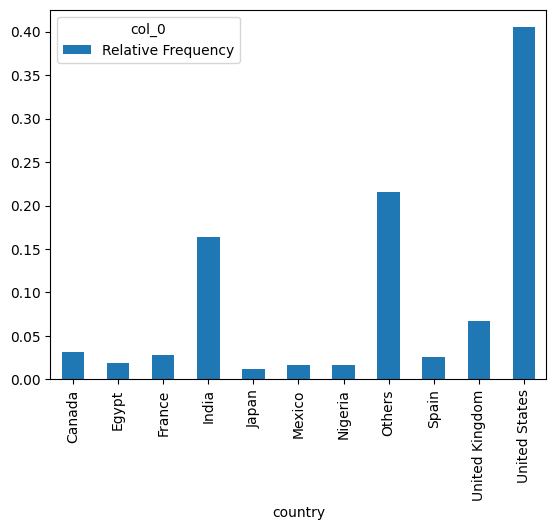

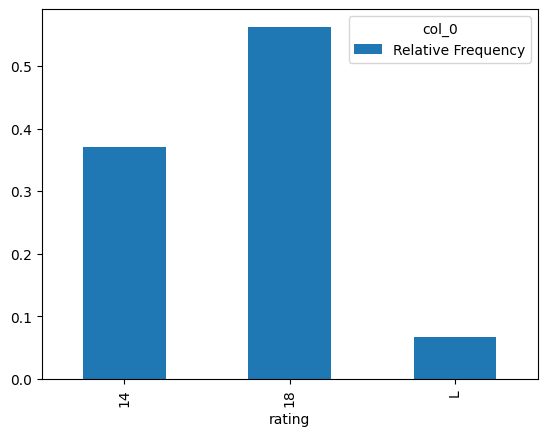

In [20]:
tab_country.plot.bar()
tab_rating.plot.bar()

In [25]:
# Two-way table or Contingency table
two_tab = pd.crosstab(index = df['country'],columns = df['rating'], normalize = 0)
two_tab

rating,14,18,L
country,,,
Canada,0.184211,0.644737,0.171053
Egypt,0.695652,0.293478,0.010870
France,0.276119,0.694030,0.029851
India,0.688608,0.288608,0.022785
Japan,0.448276,0.465517,0.086207
Mexico,0.126582,0.835443,0.037975
Nigeria,0.532468,0.467532,0.000000
Others,0.324350,0.613090,0.062560
Spain,0.120968,0.862903,0.016129


<Axes: xlabel='country'>

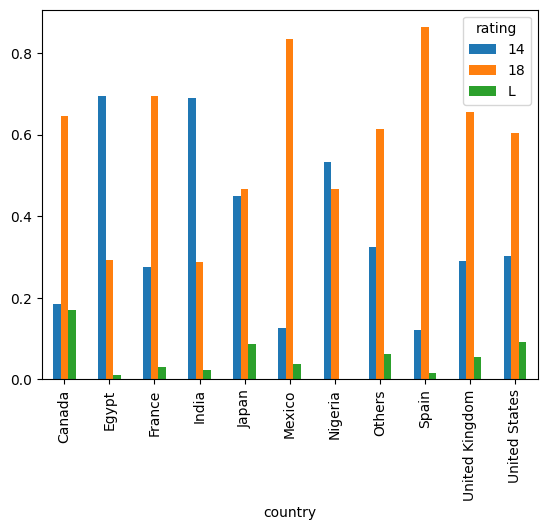

In [26]:
two_tab.plot.bar()

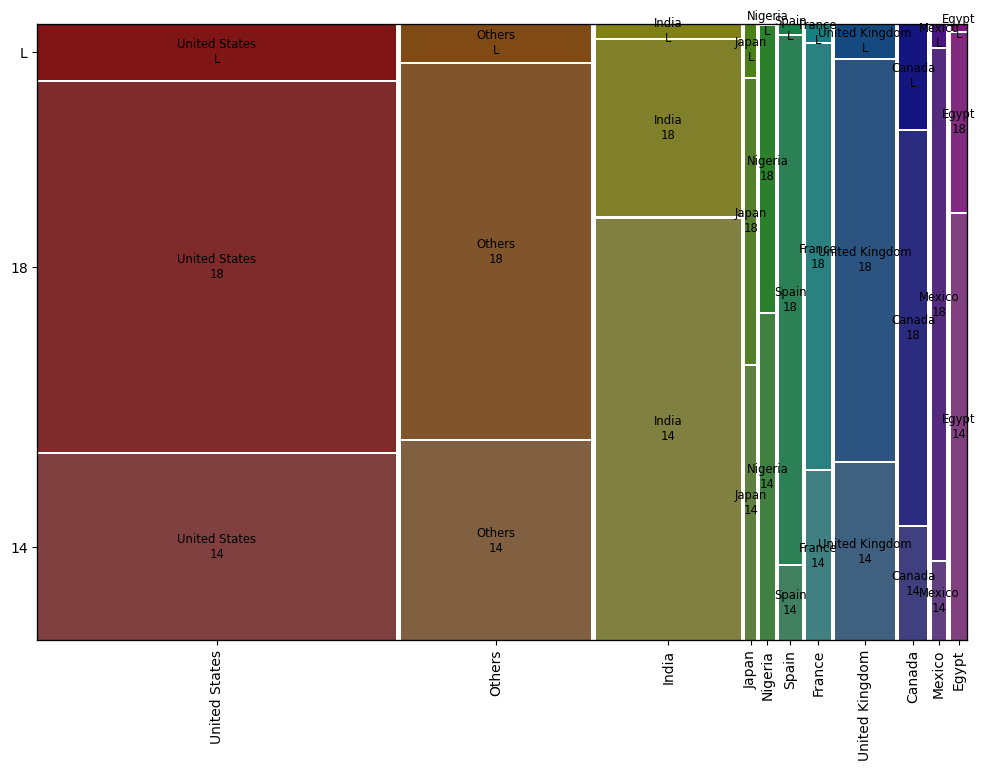

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize = (12, 8))
mosaic(df, ["country", "rating"], ax = ax)
ax.set_xticklabels(df["country"].unique().tolist(), rotation = 90)
plt.show()

### **Association Between Country and Age Rating in Netflix Productions**  

An analysis of the contingency table and graphical representations for the variables *country* and *rating* reveals a significant variation in the distribution of age classifications across different countries. The bar chart demonstrates that the classification of films is not uniformly distributed, with noticeable differences between nations. The mosaic plot further emphasizes the absence of a structured grid-like pattern, reinforcing the idea that the country of production influences the predominant age ratings of films.

If there were no association between these variables, the expectation would be a similar proportion of films in each age category across all countries. However, the data show distinct trends—some countries, such as India and Egypt, primarily produce films for audiences aged 14 and above, whereas Mexico and Spain predominantly create content for viewers over 18. This indicates that age classification varies based on the country, suggesting that local industry preferences, cultural factors, and regulatory standards may contribute to these differences.

The absence of a structured pattern in the mosaic plot does not imply independence between the variables. Instead, the variability observed across different countries reinforces the conclusion that age ratings are not randomly assigned but are influenced by regional tendencies in film production. The results demonstrate a clear association between *country* and *rating*, highlighting the impact of national contexts on the classification of films.